# Error distribution comparison

In [1]:
using NetCDF, PyPlot, ZfpCompression
using BitInformation, Statistics, StatsBase
using LinLogQuantization

In [2]:
path = "/network/aopp/chaos/pred/kloewer/esowc/cams/"
filelist = filter(x->endswith(x,"_v3.nc"),readdir(path))
varname = "q"
file = filelist[[occursin(varname,f) for f in filelist]][1]

# load file
ncfile = NetCDF.open(joinpath(path,file))
X = ncfile.vars[varname][:,:,:];

In [91]:
keepbits = 7

7

## Compress, decompress

In [92]:
X1 = round(X,keepbits)
X2 = exp.(zfp_decompress(zfp_compress(log.(X),precision=14,nthreads=4)))
X3 = Array{Float32}(LinQuant8Array(X,3))
X4 = Array{Float32}(LogQuant8Array(X,3));

## Calculate errors

In [93]:
abs_error1 = vec(X-X1)
abs_error2 = vec(X-X2)
abs_error3 = vec(X-X3)
abs_error4 = vec(X-X4);

In [94]:
dec_error1 = vec(log10.(X1./X))
dec_error2 = vec(log10.(X2./X))
dec_error3 = vec(log10.(X3./X))
dec_error4 = vec(log10.(X4./X));

## Histograms

In [95]:
amin = percentile(abs_error1,5)/200
amax = percentile(abs_error1,95)/200
nbins = 500
Δ = (amax-amin)/nbins
binsabs = collect(amin:Δ:amax)

H1abs = fit(Histogram,abs_error1,binsabs)
H2abs = fit(Histogram,abs_error2,binsabs)
H3abs = fit(Histogram,abs_error3,binsabs)
H4abs = fit(Histogram,abs_error4,binsabs);

In [96]:
dmin = percentile(abs_error1,1)
dmax = percentile(abs_error1,99)
nbins = 500
Δ = (dmax-dmin)/nbins
binsdec = collect(dmin:Δ:dmax)

H1dec = fit(Histogram,dec_error1,binsdec)
H2dec = fit(Histogram,dec_error2,binsdec)
H3dec = fit(Histogram,dec_error3,binsdec)
H4dec = fit(Histogram,dec_error4,binsdec);

## Plotting

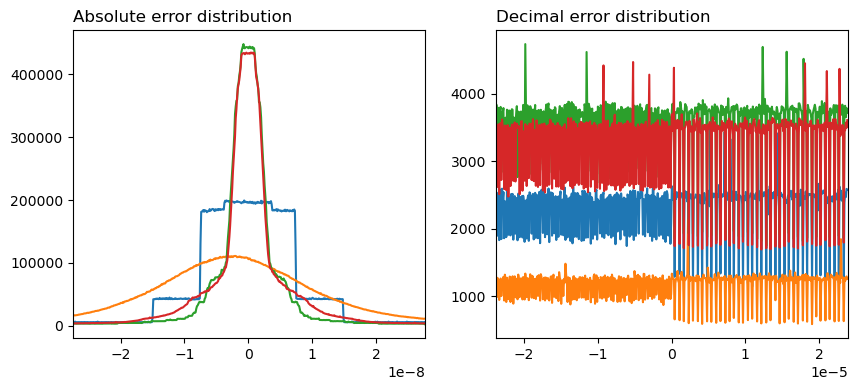

(-2.3847445845603943e-5, 2.3924745619297028e-5)

In [97]:
fig,(ax1,ax2) = subplots(1,2,figsize=(10,4))

ax1.plot(binsabs[1:end-1],H1abs.weights)
ax1.plot(binsabs[1:end-1],H2abs.weights)
ax1.plot(binsabs[1:end-1],H3abs.weights)
ax1.plot(binsabs[1:end-1],H4abs.weights)
ax1.set_title("Absolute error distribution",loc="left")

ax2.plot(binsdec[1:end-1],H1dec.weights)
ax2.plot(binsdec[1:end-1],H2dec.weights)
ax2.plot(binsdec[1:end-1],H3dec.weights)
ax2.plot(binsdec[1:end-1],H4dec.weights)
ax2.set_title("Decimal error distribution",loc="left")

ax1.set_xlim(amin,amax)
ax2.set_xlim(dmin,dmax)